<a href="https://colab.research.google.com/github/TsaniAflah/Perolehan-Mendali-pada-Olympic-2021/blob/main/TUGAS_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Tsani Aflah

Npm : 2008107010015

Kelas : Prak.Visualisasi Data B



---



**EXPLORATORY DATA ANALYSIS**

In [ ]:
pip install openpyxl

In [ ]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
df_can = pd.read_csv('Tokyo 2021 dataset v4.csv')

In [ ]:
df_can.head()

,Rank,Team/NOC,Gold Medal,Silver Medal,Bronze Medal,Total,Rank by Total,NOCCode,Continent
0,1,United States of America,39,41,33,113,1,USA,North America
1,2,People's Republic of China,38,32,18,88,2,CHN,Asia
2,3,Japan,27,14,17,58,5,JPN,Asia
3,4,Great Britain,22,21,22,65,4,GBR,Europe
4,5,ROC,20,28,23,71,3,ROC,Europe/Asia


In [ ]:
print(df_can.shape)

(93, 9)


In [ ]:
df_can.drop(["Rank by Total", "NOCCode"], axis=1, inplace=True)

In [ ]:
df_can.head()

,Rank,Team/NOC,Gold Medal,Silver Medal,Bronze Medal,Total,Continent
0,1,United States of America,39,41,33,113,North America
1,2,People's Republic of China,38,32,18,88,Asia
2,3,Japan,27,14,17,58,Asia
3,4,Great Britain,22,21,22,65,Europe
4,5,ROC,20,28,23,71,Europe/Asia


In [ ]:
df_can.rename(columns={'Team/NOC':'Country'}, inplace=True)

df_can.head()

,Rank,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Continent
0,1,United States of America,39,41,33,113,North America
1,2,People's Republic of China,38,32,18,88,Asia
2,3,Japan,27,14,17,58,Asia
3,4,Great Britain,22,21,22,65,Europe
4,5,ROC,20,28,23,71,Europe/Asia


In [ ]:
all(isinstance(column, str) for column in df_can.columns)

True

In [ ]:
df_can.set_index('Rank', inplace=True)

df_can.head()

,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Continent
Rank,,,,,,
1,United States of America,39,41,33,113,North America
2,People's Republic of China,38,32,18,88,Asia
3,Japan,27,14,17,58,Asia
4,Great Britain,22,21,22,65,Europe
5,ROC,20,28,23,71,Europe/Asia


In [ ]:
print('data dimensions:', df_can.shape)

data dimensions: (93, 6)


In [ ]:
df_top10 = df_can.sort_values(['Total'], ascending=False, axis=0).head(10)
  
df_top10

,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Continent
Rank,,,,,,
1,United States of America,39,41,33,113,North America
2,People's Republic of China,38,32,18,88,Asia
5,ROC,20,28,23,71,Europe/Asia
4,Great Britain,22,21,22,65,Europe
3,Japan,27,14,17,58,Asia
6,Australia,17,7,22,46,Australia
10,Italy,10,10,20,40,Europe
9,Germany,10,11,16,37,Europe
7,Netherlands,10,12,14,36,Europe




---



---



**F I L T E R I N G**

In [ ]:
condition = df_can['Gold Medal'] == '50'

print(condition)

Rank
1     False
2     False
3     False
4     False
5     False
      ...  
86    False
86    False
86    False
86    False
86    False
Name: Gold Medal, Length: 93, dtype: bool


In [ ]:
print('data dimensions:', df_can.shape)
print(df_can.columns)
df_can.head(8)

data dimensions: (93, 6)
Index(['Country', 'Gold Medal', 'Silver Medal', 'Bronze Medal', 'Total',
       'Continent'],
      dtype='object')


,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Continent
Rank,,,,,,
1,United States of America,39,41,33,113,North America
2,People's Republic of China,38,32,18,88,Asia
3,Japan,27,14,17,58,Asia
4,Great Britain,22,21,22,65,Europe
5,ROC,20,28,23,71,Europe/Asia
6,Australia,17,7,22,46,Australia
7,Netherlands,10,12,14,36,Europe
8,France,10,12,11,33,Europe




---



*Import Matplotlib.*

In [ ]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.2




---



---



**PIE CHART**

In [ ]:
# group countries by continents and apply sum() function 
df_continents = df_can.groupby('Continent', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,Gold Medal,Silver Medal,Bronze Medal,Total
Continent,,,,
Africa,11,12,15,38
Asia,88,71,78,237
Australia,25,13,30,68
Europe,125,145,185,455
Europe/Asia,20,28,23,71


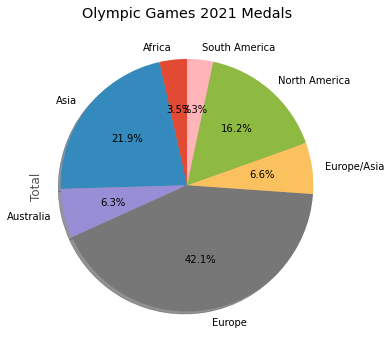

In [ ]:
# autopct create %, start angle represent starting point
df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', 
                            startangle=90,     
                            shadow=True,           
                            )

plt.title('Olympic Games 2021 Medals')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

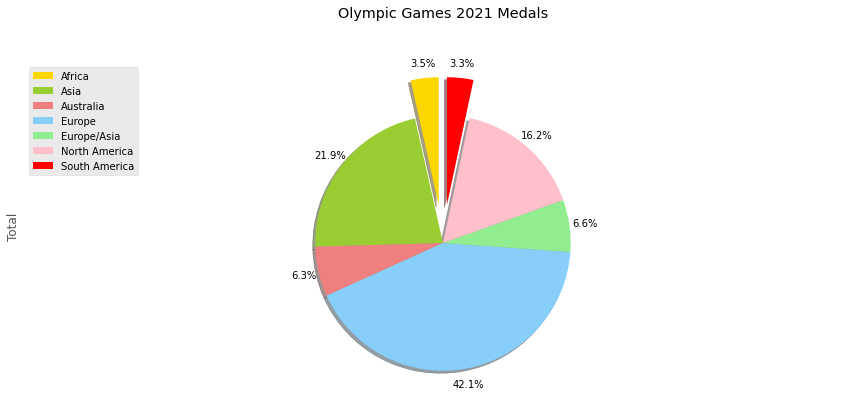

In [ ]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'red']
explode_list = [0.3, 0, 0, 0, 0, 0, 0.3] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Olympic Games 2021 Medals', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()



---



---



**BOX PLOT**

In [ ]:
Medals = ['Gold Medal', 'Silver Medal', 'Bronze Medal']

Medals

['Gold Medal', 'Silver Medal', 'Bronze Medal']

In [ ]:
df_indonesia = df_can.loc[[55], Medals].transpose()
df_indonesia.head()

Rank,55
Gold Medal,1
Silver Medal,1
Bronze Medal,3


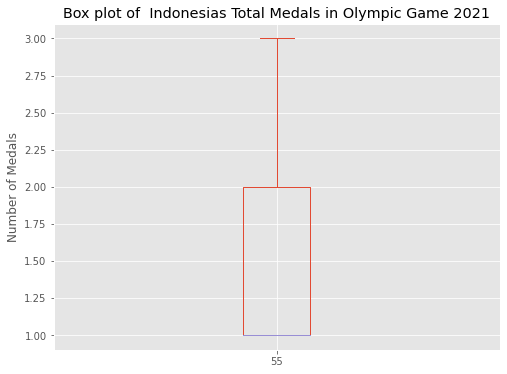

In [ ]:
df_indonesia.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of  Indonesias Total Medals in Olympic Game 2021')
plt.ylabel('Number of Medals')

plt.show()

In [ ]:
df_indonesia.describe()

Rank,55
count,3.000000
mean,1.666667
std,1.154701
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,3.000000




---



In [ ]:
df_USA = df_can.loc[[1], Medals].transpose()
df_USA.head()

Rank,1
Gold Medal,39
Silver Medal,41
Bronze Medal,33


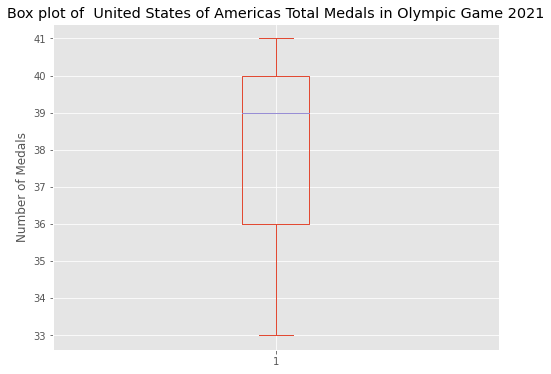

In [ ]:
df_USA.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of  United States of Americas Total Medals in Olympic Game 2021')
plt.ylabel('Number of Medals')

plt.show()

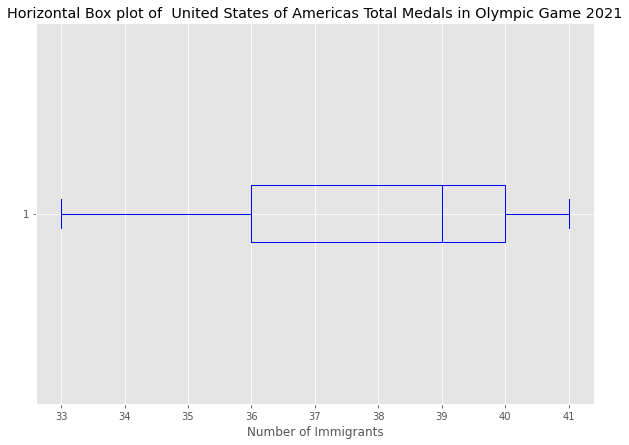

In [ ]:
df_USA.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Horizontal Box plot of  United States of Americas Total Medals in Olympic Game 2021')
plt.xlabel('Number of Immigrants')

plt.show()

*Comparison of medal gains by USA and Japan in Olympic Games 2021*

In [ ]:
df_UJ= df_can.loc[[1, 3], Medals].transpose()
    
df_UJ.head()

Rank,1,3
Gold Medal,39,27
Silver Medal,41,14
Bronze Medal,33,17


In [ ]:
 df_UJ.describe()

Rank,1,3
count,3.000000,3.000000
mean,37.666667,19.333333
std,4.163332,6.806859
min,33.000000,14.000000
25%,36.000000,15.500000
50%,39.000000,17.000000
75%,40.000000,22.000000
max,41.000000,27.000000


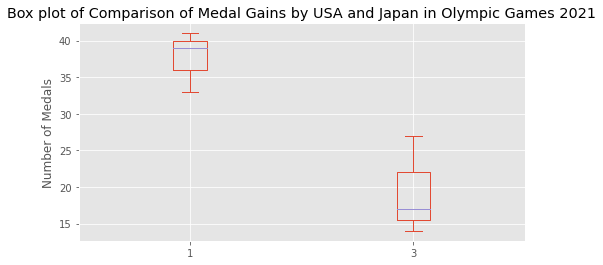

In [ ]:
df_UJ.plot(kind='box', figsize=(8, 4))

plt.title('Box plot of Comparison of Medal Gains by USA and Japan in Olympic Games 2021')
plt.ylabel('Number of Medals')

plt.show()

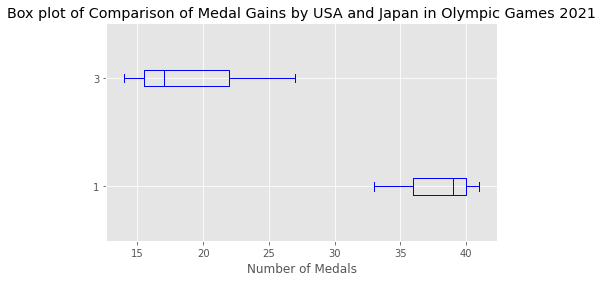

In [ ]:
df_UJ.plot(kind='box', figsize=(7, 4), color='blue', vert=False)

plt.title('Box plot of Comparison of Medal Gains by USA and Japan in Olympic Games 2021')
plt.xlabel('Number of Medals')

plt.show()

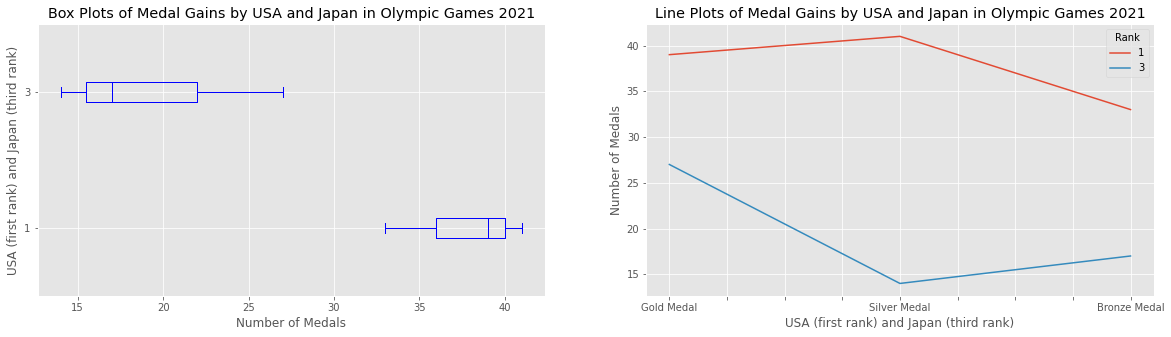

In [ ]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_UJ.plot(kind='box', color='blue', vert=False, figsize=(20, 5), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Medal Gains by USA and Japan in Olympic Games 2021')
ax0.set_xlabel('Number of Medals')
ax0.set_ylabel('USA (first rank) and Japan (third rank)')

# Subplot 2: Line plot
df_UJ.plot(kind='line', figsize=(20, 5), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Medal Gains by USA and Japan in Olympic Games 2021')
ax1.set_ylabel('Number of Medals')
ax1.set_xlabel('USA (first rank) and Japan (third rank)')

plt.show()



---



---



**SCATTER PLOTS**

In [ ]:
df_tot = pd.DataFrame(df_can[Medals].sum(axis=0))

In [ ]:
# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

In [ ]:
# rename columns
df_tot.columns = ['Medals', 'Total']

In [ ]:
# view the final dataframe
df_tot.head()

,Medals,Total
0,Gold Medal,340
1,Silver Medal,338
2,Bronze Medal,402


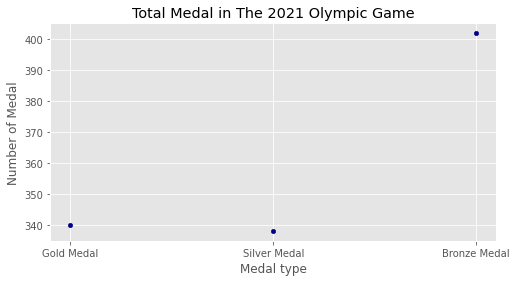

In [ ]:
df_tot.plot(kind='scatter', x='Medals', y='Total', figsize=(8, 4), color='darkblue')

plt.title('Total Medal in The 2021 Olympic Game')
plt.xlabel('Medal type')
plt.ylabel('Number of Medal')

plt.show()

*Note : satu titik pada scatterplot merepresentasikan satu data. Pada gambar dapat dilihat hanya terdapat tiga titik yang mana mewakili banyaknya Gold Medal, Silver Medal, dan Bronze Medal yang diperoleh atlit selama olympic game 2021 berlangsung.*